In [1]:
##importing data into Jupyter Notebook
import pandas as pd
df_dis = pd.read_csv("mp1_av_disengagements.csv")
df_mil = pd.read_csv("mp1_av_totalmiles.csv")

In [2]:
print("Total number of AV disengagements over the entire duration of available data :",len(df_dis))

Total number of AV disengagements over the entire duration of available data : 1024


In [3]:
# Counting the number of unique months that have recorded AV disengagements
m = len(df_dis.groupby('Month').count())
print("Number of unique months that have recorded AV disengagements :",m)

Number of unique months that have recorded AV disengagements : 15


In [4]:
# Splitting the month and year and then counting unique months - This will be later used to set the right index
df_dis['month']=df_dis['Month'].apply(lambda x:x.split('-')[1])

In [5]:
print("List of unique locations of AV disengagements :",df_dis['Location'].unique())

List of unique locations of AV disengagements : ['urban-street' 'highway']


In [6]:
print("Number of unique causes of AV disengagements :",len(df_dis['Cause'].unique()))

Number of unique causes of AV disengagements : 10


In [7]:
print("Number of missing values :",df_dis.isnull().sum().sum())

Number of missing values : 532


Text(0.5,1,'Causes of disengagement')

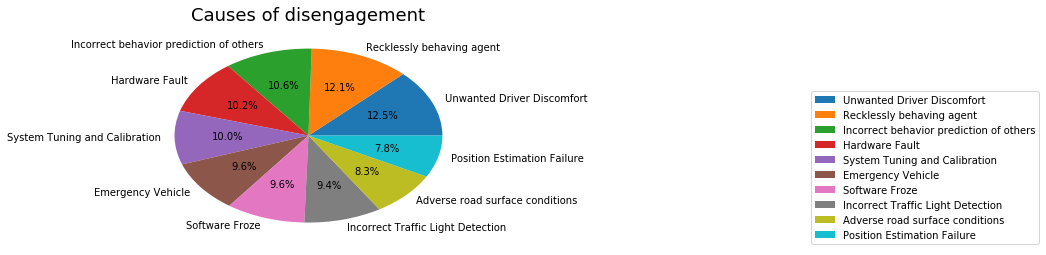

In [9]:
import matplotlib.pyplot as plt
Cause=df_dis['Cause'].value_counts()

#pie chart
patches,texts,_=plt.pie(Cause,labels=Cause.keys(),autopct='%1.1f%%')
plt.legend(loc=(2,0))
plt.title("Causes of disengagement", fontsize=18)

In [10]:
print("Based on pie chart, top two leading causes are :\n1) Unwanted Driver Discomfort\n2) Recklessly behaving agent")

Based on pie chart, top two leading causes are :
1) Unwanted Driver Discomfort
2) Recklessly behaving agent


In [11]:
#Creating timestamp from Month column
date_list = []
for i in df_mil['Month']:
    date_list.append(pd.to_datetime("20" + str(i.split("-")[0]) + " " + str(i.split("-")[1])))
df_mil['Timestamp']= date_list
df_milg = df_mil.groupby('Timestamp').sum()

In [12]:
#Disengagement/Mile over time with monthly granularity
df_milg['Dis/Mile']=df_milg['total number of disengagements']/df_milg['miles driven in autonomous mode']

In [13]:
df_mil = df_milg

Text(0.5,1,'Trend of AV Disengagement/Mile over time')

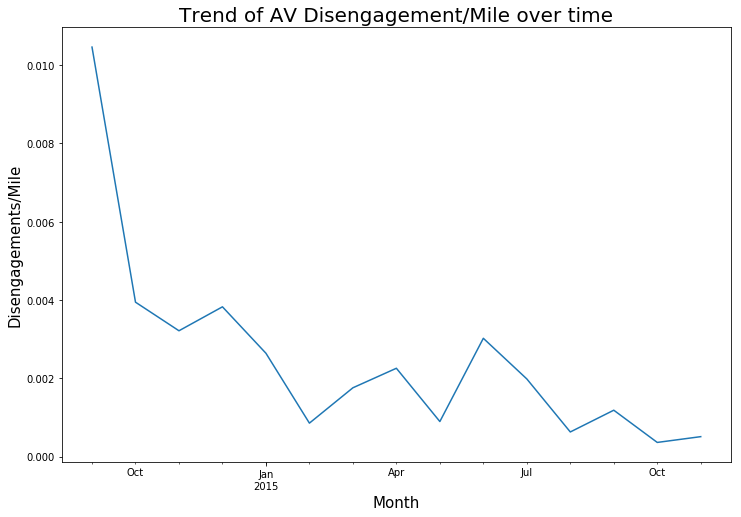

In [14]:
df_mil.groupby('Timestamp').sum()['Dis/Mile'].plot(figsize=(12,8))
plt.xlabel("Month",size=15)
plt.ylabel("Disengagements/Mile",size=15)
plt.title("Trend of AV Disengagement/Mile over time", size=20)


Yes, the AVs are maturing over time as the number of Disengagements per mile is decreasing over time.

### The following distributions signify about the samples drawn from it:

#### a. Gaussian distribution:

To answer this, we referenced: https://en.wikipedia.org/wiki/Normal_distribution

This distribution signify that the samples drawn from it is symmetry by the mean of the distribution and it is unimodal. The distribution is the highest at the mean and descend towards two opposite directions from the mean until it reach near zero but never actually touch that. 

The normal density is given by:
$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp{\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]}, \quad -\infty<x<\infty$$
where $\mu$ is the mean of the distribution and $\sigma$ is the variance of the distributions.

The distribution function $F(x)$ has no closed form, so between every pair of limits a and b, probabilities relating to normal distributions are usually obtained numerically and recorded in special tables.

These tables apply to the standard normal distribution $Z~N(0,1)$ -- a normal distribution with parameters $\mu=0, \sigma = 1$ and their entries values are:
$$F_z(z) = \frac{1}{\sqrt{2\pi}}\int^z_{-\infty} e^{-t^2/2}dt$$

#### b. Exponential distribution:

To answer this, we referenced: https://en.wikipedia.org/wiki/Exponential_distribution

This signify that the samples have the form of the continuous analague of the goemetric distribution. It is of highest value near the beginning of the function then smoothly and continuously descend until it reaches near zero but never actually touch zero. If samples $X$ is of exponential distribution, we can use the notation $X~EXP(\lambda)$.

Its CDF is given as:

The pdf of it is:
$$f(x) =
  \begin{cases}
    \lambda e^{-\lambda x}       & \quad \text{if } x>0\\
    0  & \quad \text{otherwise } 
  \end{cases}
$$

One of the most important properties of the exponential distribution is its memoryless properties. Which essentially states that the probability of something will happen only depend on the probabilityof that happening from that point, despite the past. Its fomula is:
$$P(T>s+t|T>s) = P(T>t)$$


#### c. Weibull distribution:

To answer this, we referenced: https://en.wikipedia.org/wiki/Weibull_distribution

This distribution signify two parameter continuous probability distributions with $\lambda$ defines the scale and $k$ defines the shape, resulting in very different forms for the distribution depending on the parameters.

Shape paremeters $\alpha$ and $\beta$:
$$f(x;\lambda,k) =
  \begin{cases}
    \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{\left(-x/\lambda\right)^k}      & \quad \text{if } x\geq 0\\
    0  & \quad \text{otherwise } 
  \end{cases}
$$

Shape parameter $k$ indicates:
<ul>
    <li>$k<1$: failure rate decreases over time</li>
    <li>$k=1$: failure rate is constant over time</li>
    <li>$k>1$: failure rate increases over time</li>
</ul>


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


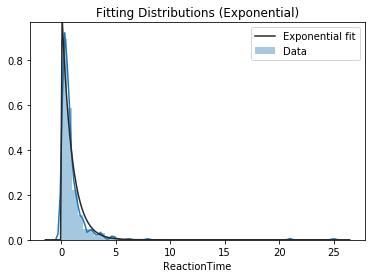

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


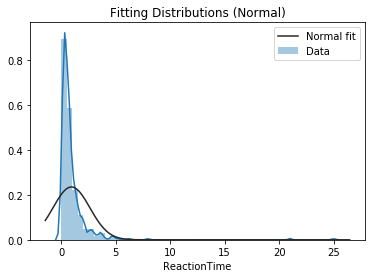

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


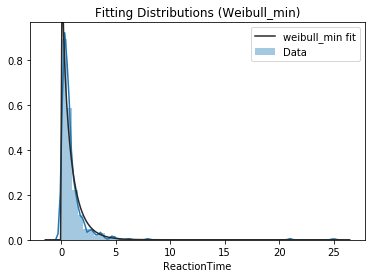

In [15]:
import seaborn as sns
from scipy import stats

#fitting the exponential distribution
ax1 =sns.distplot(df_dis['ReactionTime'].dropna(),fit=stats.expon)
plt.title('Fitting Distributions (Exponential)')
plt.legend(['Exponential fit', 'Data'])
plt.show()

#fitting the normal distribution
ax2 = sns.distplot(df_dis['ReactionTime'].dropna(),fit=stats.norm, kde=True)
plt.title('Fitting Distributions (Normal)')
plt.legend(['Normal fit', 'Data'])
plt.show()

#fitting the weibull_min distribution
ax3 = sns.distplot(df_dis['ReactionTime'].dropna(),fit=stats.weibull_min, kde=True)
plt.title('Fitting Distributions (Weibull_min)')
plt.legend(['weibull_min fit', 'Data'])
plt.show()


From the above distribution plots, we can conclude that the reaction time closely follows the $\bf distribution\ of\ exponential\ and\ weibull$.

Further we observe that the probability that reaction time is less than 3 seconds is high. Therefore, the AVs tend to be safer as they react within a short span of time to externalities that they cannot handle on its own.

In [16]:
mean=df_dis['ReactionTime'].mean()
print("Average reaction time for the entire duration of the dataset is = ", mean)

Average reaction time for the entire duration of the dataset is =  0.9297703252032526


In [17]:
mean_location=df_dis.groupby('Location')['ReactionTime'].mean()
mean_location

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64

$Null\ Hypothesis\ (H_o): mean\ reaction\ time\ for\ humans\ in\ non-AV\ cars\ = mean\ reaction\ time\ for\ humans\ in\ AV\ cars$


$Alternate\ Hypothesis\ (H_a): mean\ reaction\ time\ for\ humans\ in\ non-AV\ cars\ \neq mean\ reaction\ time\ for\ humans\ in\ AV\ cars$

In [18]:
reaction_time_non_AV = 1.09 #Given in the question
reaction_time_AV = df_dis['ReactionTime'].mean()

In [19]:
#importing the library to be used for one-sample t-test
from scipy import stats
import numpy as np

In [20]:
# Taking onle those rows where the reaction time is not NA
df_dis2 = df_dis[np.isfinite(df_dis['ReactionTime'])]

In [21]:
#Performing the one sample t-test using the stats package
stats.ttest_1samp(a = np.array(df_dis2['ReactionTime']), popmean = reaction_time_non_AV)

Ttest_1sampResult(statistic=-2.0986037086235854, pvalue=0.03636206696694606)

$We\ can\ clearly\ see\ the\ the\ p-value\ is\ {\bf0.03636}\ which\ is\ less\ than\ 0.05.$

$Therefore,\ at\ \alpha = 0.05, we\ can\ reject\ the\ null\ hypothesis\ and\ conclude\ that\ the\\ mean\ reaction\ time\ for\ humans\ in\ non-AV\ cars\ \neq mean\ reaction\ time\ for\ humans\ in\ AV\ cars$

In [22]:
import seaborn as sns
from scipy import stats

Text(0,0.5,'Frequency')

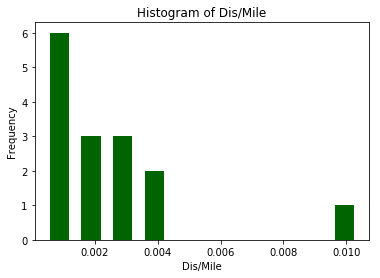

In [23]:
#Plotting the histogram of disengagements/mile
plt.hist(df_mil['Dis/Mile'], bins = 10, rwidth = 0.6, color = 'darkgreen')
plt.title('Histogram of Dis/Mile')
plt.xlabel('Dis/Mile')
plt.ylabel('Frequency')

The above figure represents the histogram of disengagements/mile with monthly granularity. Since, we don't have enough datapoints, it is difficult to plot the probability distribution.

Therefore, we have used 'Seaborn' library and its distplot function which plots the probability distribution of sparse data by scaling it.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


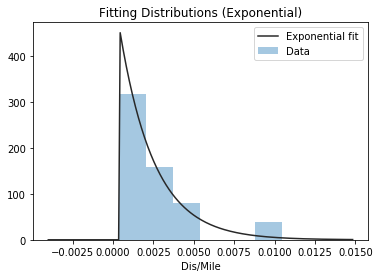

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


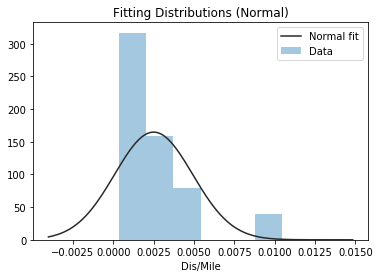

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


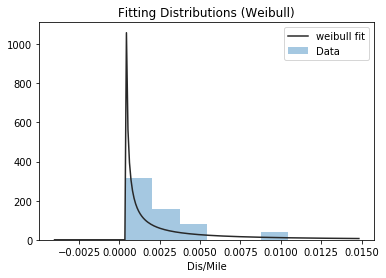

In [24]:
#Fitting the Exponential distribution
ax=sns.distplot(df_mil['Dis/Mile'].dropna(),fit=stats.expon, kde=False)
plt.title('Fitting Distributions (Exponential)')
plt.legend(['Exponential fit', 'Data'])
plt.show()

#Fitting the Normal distribution
ax=sns.distplot(df_mil['Dis/Mile'].dropna(),fit=stats.norm, kde=False)
plt.title('Fitting Distributions (Normal)')
plt.legend(['Normal fit', 'Data'])
plt.show()

#Fitting the Weibull distribution
ax=sns.distplot(df_mil['Dis/Mile'].dropna(),fit=stats.weibull_min, kde=False)
plt.title('Fitting Distributions (Weibull)')
plt.legend(['weibull fit', 'Data'])
plt.show()

We can see in the above distribution plots that disengagements/mile follows ${\bf exponential\ distribution}$ the best.

This signifies that the majority of the occurences of disengagements/mile lie in the range of 0 - 0.0050 dis/mile. It is because the number of disengagements/mile decreased exponentially with time, which lead to higher number of occurences in the 0 - 0.0050 dis/mile range and lesser number of occurences in the higher dis/mile range.


$\bf{Given\ Assumptions}$:
- There can be at most one disengagement in a mile
- A day can be either clear or cloudy, but not both. The probability of a day being clear in California is 72%
- The AV is equally likely to drive on a cloudy day as on a clear day

From the above assumption number 2, we can define that $\bf{P(clear) = 0.72}$ and $\bf{P(cloudy) = 0.28}$

The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a  $\bf{Bernoulli}$ distribution  (the number of disengagements per mile takes two values 0 or 1). Sequence of such events is binomially distributed.
 

In [25]:
import scipy.stats as st

In [26]:
#Disengagements per mile in cloudy conditions
total_miles_cloudy = int(round(df_mil['miles driven in autonomous mode'].sum()*0.28,0))
prob_diseng_per_mile = 0.5
diseng_under_cloudy_conditions = df_dis[df_dis['Weather'] == 'cloudy'].count()[0]

In [27]:
#Using the normal approximation:
mean_a = total_miles_cloudy*prob_diseng_per_mile
variance_a = total_miles_cloudy*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_a = st.norm(mean_a, variance_a).cdf(diseng_under_cloudy_conditions)

In [28]:
print("The probability of disengagement per mile on a cloudy day is: ", round(prob_a,4))

The probability of disengagement per mile on a cloudy day is:  0.0241


In [29]:
#Disengagements per mile in clear conditions
total_miles_clear = int(round(df_mil['miles driven in autonomous mode'].sum()*0.72,0))
prob_diseng_per_mile = 0.5
diseng_under_clear_conditions = df_dis[df_dis['Weather'] == 'clear'].count()[0]

In [30]:
#Using the normal approximation:
mean_b = total_miles_clear*prob_diseng_per_mile
variance_b = total_miles_clear*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_b = st.norm(mean_b, variance_b).cdf(diseng_under_clear_conditions)

In [31]:
print("The probability of disengagement per mile on a clear day is: ", round(prob_b,4))

The probability of disengagement per mile on a clear day is:  0.0229


We can see that the probability of disengagement per mile is higher during cloudy conditions compared to clear conditions.

#### Automatic disengagement per mile on a cloudy day

In [32]:
#Creating a separate dataframe for automatic disengagements:
df_dis_automatic = df_dis[df_dis['TypeOfTrigger'] == 'automatic']

In [33]:
#Calculating total miles travelled by the AV in cloudy conditions
total_miles_cloudy = int(round(df_mil['miles driven in autonomous mode'].sum()*0.28,0))
prob_diseng_per_mile = 0.5
diseng_under_cloudy_conditions = df_dis_automatic[df_dis_automatic['Weather'] == 'cloudy'].count()[0]

In [34]:
#Using the normal approximation:
mean_a = total_miles_cloudy*prob_diseng_per_mile
variance_a = total_miles_cloudy*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_a = st.norm(mean_a, variance_a).cdf(diseng_under_cloudy_conditions)

In [35]:
print("The probability of automatic disengagement per mile on a cloudy day is: ", round(prob_a,4))

The probability of automatic disengagement per mile on a cloudy day is:  0.0234


#### Automatic disengagement per mile on a clear day


In [36]:
#Calculating total miles travelled by the AV in clear conditions
total_miles_clear = int(round(df_mil['miles driven in autonomous mode'].sum()*0.72,0))
prob_diseng_per_mile = 0.5
diseng_under_clear_conditions = df_dis_automatic[df_dis_automatic['Weather'] == 'clear'].count()[0]

In [37]:
#Using the normal approximation:
mean_b = total_miles_clear*prob_diseng_per_mile
variance_b = total_miles_clear*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_b = st.norm(mean_b, variance_b).cdf(diseng_under_clear_conditions)

In [38]:
print("The probability of automatic disengagement per mile on a clear day is: ", round(prob_b,4))

The probability of automatic disengagement per mile on a clear day is:  0.0228


### (E)

In [39]:
# assuming 10000 Miles are covered in cloudy conditions
no_of_miles = 10000
no_of_disengagements = 150
prob_diseng_per_mile = 0.5
mean_c = no_of_miles*prob_diseng_per_mile
var_c = no_of_miles*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_c = 1 - st.norm(mean_c,var_c).cdf(no_of_disengagements)
print("The probability that there are more than 150 disengagements in 10000 miles is :", round(prob_c,4))

The probability that there are more than 150 disengagements in 10000 miles is : 0.9738


Given information:

$\alpha$ = 0.05

$\bf{Ask}$: Test the hypothesis that AV has more disengagements on cloudy days than clear days

$\bf{Null\ hypothesis}$: Disengagements on cloudy days <= Disengagements on clear days

$\bf{Alternate\ hypothesis}$: Disengagements on cloudy days > Disengagements on clear days

$$z=\frac{(\hat{p_1}-\hat{p_2})-(p_1-p_2)}{\sqrt{\hat{p}.(1-\hat{p}).(\frac{1}{n_1}+\frac{1}{n_2})}}$$


$$\hat{p}= \frac{X_1+X_2}{n_1+n_2}$$

In [40]:
#Calculating the parameters which are needed for z-value
proportion_clear = df_dis.groupby('Weather').count()['Month'][0]/df_dis.groupby('Weather').count()['Month'].sum()
proportion_cloudy = df_dis.groupby('Weather').count()['Month'][1]/df_dis.groupby('Weather').count()['Month'].sum()
total_count = df_dis.groupby('Weather').count()['Month'].sum()

In [41]:
#Calculating p_hat for the given data
p_hat = (df_dis.groupby('Weather').count()['Month'][0] + df_dis.groupby('Weather').count()['Month'][1]) / \
            (total_count + total_count)

In [42]:
#Calculating the Z_value
z_value = (proportion_cloudy - proportion_clear) / ((p_hat*(1-p_hat)*((1 / total_count) + (1 / total_count)))**0.5)
print("The calculated Z_Value is", round(z_value,4))

The calculated Z_Value is 28.5494


In [43]:
#Checking the Z critical value at alpha = 0.05
z_critical = st.norm.ppf(0.95)
z_critical

1.6448536269514722

As we can see that the calculated z-value from the given data is greater than the critical z-value at $\bf{\alpha=0.05}$.

Therefore, we can reject the null hypothesis and conclude that $\bf{the\ number\ of\ disengagements\ on\ cloudy\ days\ is\ more\ than\ the\ number\ of\ disengagements\ on\ clear\ days.}$

Also, it is fair to conclude that cloudy weather has severe effect on the safety of AVs.

$\bf{Using\ Bayes\ theorem:}$


\begin{equation*}
P(react\_time>0.5\ |\ disengagements\ occuring\ in \ cloudy\ condition) = \frac{P(\ disengagements\ occuring\ in \ cloudy\ condition\ |\ react\_time>0.5) * P(react\_time > 0.5)}{P(\ disengagements\ occuring \ in \ cloudy\ condition)}
\end{equation*}

In [44]:
#Creating a separate dataframe for automatic disengagements:
df_dis_automatic = df_dis[df_dis['TypeOfTrigger'] == 'automatic']

In [45]:
#Checking if there are (reaction time) null values in automatic disengagements
df_dis_automatic[df_dis_automatic['ReactionTime'].isnull()]

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,month
837,15-Jul,WDD2221851A001072,urban-street,cloudy,automatic,NaN,System Tuning and Calibration,Jul
889,15-Sep,WDD2221851A001072,urban-street,cloudy,automatic,NaN,Unwanted Driver Discomfort,Sep


In [46]:
#Removing the null values from automatic disengagements
df_dis_automatic = df_dis_automatic[~df_dis_automatic['ReactionTime'].isnull()]

In [47]:
react_time_gt_05 = df_dis_automatic['ReactionTime'] > 0.5
prob_react_time_gt_05 = (df_dis_automatic[react_time_gt_05].count()[5]) /\
(df_dis_automatic.count()[5])

In [48]:
#Probability of the day being cloudy in California is given as 0.28
cloudy = df_dis_automatic['Weather'] == 'cloudy'
prob_cloudy = (df_dis_automatic[cloudy].count()[5]) / (df_dis_automatic.count()[4])

In [49]:
prob_cloudy_given_react_time_gt_05 = \
df_dis_automatic[react_time_gt_05][df_dis_automatic[react_time_gt_05]['Weather'] == 'cloudy'].count()[5]/\
df_dis_automatic[react_time_gt_05].count()[5]

In [50]:
#Using Bayes theorem to calculate the needed conditional probability
prob_react_time_gt_05_given_cloudy = (prob_cloudy_given_react_time_gt_05 * prob_react_time_gt_05)/prob_cloudy

In [51]:
print("The probability of reaction time is greater than 0.5 secs given the weather is cloudy is: ", round(prob_react_time_gt_05_given_cloudy,4))

The probability of reaction time is greater than 0.5 secs given the weather is cloudy is:  0.5418


$\bf{By\ Bayes\ theorem:}$


\begin{equation*}
P(react\_time>0.7\ |\ disengagements\ occuring\ in \ clear\ condition) = \frac{P(\ disengagements\ occuring\ in \ clear\ condition\ |\ react\_time>0.7) * P(react\_time > 0.7)}{P(\ disengagements\ occuring\ in \ clear\ condition)}
\end{equation*}

In [52]:
react_time_gt_07 = df_dis_automatic['ReactionTime'] > 0.7
prob_react_time_gt_07 = (df_dis_automatic[react_time_gt_07].count()[5]) /\
(df_dis_automatic.count()[5])

In [53]:
clear = df_dis_automatic['Weather'] == 'clear'
prob_clear = (df_dis_automatic[clear].count()[5]) / (df_dis_automatic.count()[4])

In [54]:
prob_clear_given_react_time_gt_07 = \
df_dis_automatic[react_time_gt_07][df_dis_automatic[react_time_gt_07]['Weather'] == 'clear'].count()[5]/\
df_dis_automatic[react_time_gt_07].count()[5]

In [55]:
#Using Bayes theorem to calculate the needed conditional probability
prob_react_time_gt_07_given_clear = (prob_clear_given_react_time_gt_07 * prob_react_time_gt_07)/prob_clear

In [56]:
print("The probability of reaction time is greater than 0.7 secs given the weather is clear is: ", round(prob_react_time_gt_07_given_clear,4))

The probability of reaction time is greater than 0.7 secs given the weather is clear is:  0.3854


###### Calculating the probability of accident under given conditions in cloudy weather

In [57]:
total_miles_cloudy = int(round(df_mil['miles driven in autonomous mode'].sum()*0.28,0))
total_diseng_react_time_gt_05 = int(df_dis_automatic[react_time_gt_05].count()[5])
prob_diseng_per_mile = 0.5

As disengagement/mile follows binomial distribution and the given number of miles travelled by the vehicle is large, we can use normal approximation to calculate the required probability.

As we know, the normal approximation for our binomial variable has a mean of $\bf{np}$ and a standard deviation of $\bf{\sqrt{np(1 - p)}}$



In [58]:
print("The total number of disengagements under cloudy condition given the accident conditions is: ", total_diseng_react_time_gt_05)
print("Total miles covered by the vehicle under cloudy conditions is: ", total_miles_cloudy)

The total number of disengagements under cloudy condition given the accident conditions is:  267
Total miles covered by the vehicle under cloudy conditions is:  141464


In [59]:
#Using the normal approximation:
mean_a = total_miles_cloudy*prob_diseng_per_mile
variance_a = total_miles_cloudy*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_a = st.norm(mean_a, variance_a).cdf(total_diseng_react_time_gt_05)

In [60]:
print("The probability of accident under given conditions in cloudy weather is: ", round(prob_a, 4))

The probability of accident under given conditions in cloudy weather is:  0.0232


###### Calculating the probability of accident under given conditions in clear weather

In [61]:
total_miles_clear = int(round(df_mil['miles driven in autonomous mode'].sum()*0.72,0))
total_diseng_react_time_gt_07 = int(df_dis_automatic[react_time_gt_07].count()[5])
prob_diseng_per_mile = 0.5

In [62]:
print("The total number of disengagements under cloudy condition given the accident conditions is: ", total_diseng_react_time_gt_07)
print("Total miles covered by the vehicle under cloudy conditions is: ", total_miles_clear)

The total number of disengagements under cloudy condition given the accident conditions is:  191
Total miles covered by the vehicle under cloudy conditions is:  363765


In [63]:
#Using the normal approximation:
mean_b = total_miles_clear*prob_diseng_per_mile
variance_b = total_miles_clear*prob_diseng_per_mile*(1-prob_diseng_per_mile)
prob_b = st.norm(mean_b, variance_b).cdf(total_diseng_react_time_gt_07)

In [64]:
print("The probability of accident under given conditions in clear weather is: ", round(prob_b, 4))

The probability of accident under given conditions in clear weather is:  0.0229


##### Calculating the probability of accident using the theorem of total probability

$P(Accident) = P(Accident|Cloudy) * P(Cloudy) + P(Accident|Clear) * P(Clear)$

In [65]:
prob_accident = (prob_a*0.28) +(prob_b*0.72)
print("The probability of accident is: ", round(prob_accident,4))

The probability of accident is:  0.0229


Here, it is given that the probability of a human driver causing a car accident is $2\times10^{-6}$. We have found above that AVs display a probability of $\approx 2\times10^{-2}$ of causing accidents. This value is significantly higher than that of a human, showing that AVs have a long way to go in terms of safety and performance. AVs are still incapable of reacting faster during adverse external conditions such as Incorrect traffic light detection, adverse road surface conditions etc as compared to humans.   

This statistics show that it is relatively more dangerous to give complete control to the AVs without any human supervision. We see that despite having a very low probability for humans, we still witness accidents frequently. So we can deduce that AVs are much more likely to cause severe casualties.

In [66]:
#Getting rid of month column which we no longer require
df_dis = df_dis.drop('month', axis=1)

#### Modifying the dataframe and adding the Class column

In [67]:
#Calculating the number of records:
n = len(df_dis)

#Defining the list for each classes
Controller = ['Incorrect behavior prediction of others', 'Recklessly behaving agent', 'Unwanted Driver Discomfort']
Perception_System = ['Adverse road surface conditions', 'Emergency Vehicle', 'Position Estimation Failure', 'Incorrect Traffic Light Detection']
Computer_System = ['System Tuning and Calibration', 'Hardware Fault', 'Software Froze']

#Defining an empty class list
Disengagement_class = list()

for i in range(0,n):
    if df_dis['Cause'][i] in Controller:
        Disengagement_class.append('Controller')
    elif df_dis['Cause'][i] in Perception_System:
        Disengagement_class.append('Perception System')
    elif df_dis['Cause'][i] in Computer_System:
        Disengagement_class.append('Computer System')

#Adding the Class column to the data frame
df_dis['Class'] = Disengagement_class


#### Randomly splitting the dataset into training-testing(80-20 split)

In [68]:
#Counting the number of records
n = len(df_dis)

#Defining a serial number list for the dataframe:
S_No = np.arange(1,n+1)

#Importing random package
import random
random.seed(2) #Setting the seed to ensure same result is obtained everytime the file is run

#Shuffling the list of serial number
random.shuffle(S_No)

#Assigning the shuffled serial number list to the data frame
df_dis['S_No'] = S_No

#Sorting the data frame as per the shuffled serial number:
df_dis = df_dis.sort_values(by=['S_No'])

#Splitting the dataset into training and testing
#Also, I'm subsetting the main dataframe and taking the columns required to build the Naive Bayes model
disengagement_train = df_dis.iloc[0:820, [2,3,4,7]]
disengagement_train = disengagement_train.reset_index()
disengagement_train = disengagement_train.drop('index', axis = 1)

disengagement_test = df_dis.iloc[820:n, [2,3,4,7]]
disengagement_test = disengagement_test.reset_index()
disengagement_test = disengagement_test.drop('index', axis = 1)

#### Building the Naive Bayes function for our dataset

In [69]:
#Creating a Naive Bayes training function

def naive_bayes_training(disengagement_train):
    
    """This is the naive bayes training function which takes the train dataframe as input and
    calculate the necessary probabilities required for classifying the class in test dataset"""
    
    #Definging the global variables which will be needed in classifying the test set
    global prob_controller, prob_perception_system, prob_computer_system, prob_urban_given_controller, prob_highway_given_controller, \
    prob_urban_given_perception_system, prob_highway_given_perception_system, prob_urban_given_computer_system, prob_highway_given_computer_system, \
    prob_clear_given_controller, prob_cloudy_given_controller, prob_clear_given_perception_system, prob_cloudy_given_perception_system, \
    prob_clear_given_computer_system, prob_cloudy_given_computer_system, prob_automatic_given_controller, prob_manual_given_controller, \
    prob_automatic_given_perception_system, prob_manual_given_perception_system, prob_automatic_given_computer_system, prob_manual_given_computer_system
    
    
    #Calculating the total records in the train dataset
    total_records = len(disengagement_train)

    #Defining the boolean vectors for all classes which I will be using later to calculate different probabilities
    controller_bool = disengagement_train['Class'] == 'Controller'
    perception_bool = disengagement_train['Class'] == 'Perception System'
    computer_bool = disengagement_train['Class'] == 'Computer System'


    #from the training data, I first need to calculate the probability of each class separately
    prob_controller = disengagement_train[controller_bool].count()[0] / total_records
    prob_perception_system = disengagement_train[perception_bool].count()[0] / total_records
    prob_computer_system = disengagement_train[computer_bool].count()[0] / total_records

    #Calculating conditional probabilites for all features given classes:

    #Location
    prob_urban_given_controller = list(disengagement_train[controller_bool]['Location']== 'urban-street').count(True) / list(controller_bool).count(True)
    prob_highway_given_controller = list(disengagement_train[controller_bool]['Location']== 'highway').count(True) / list(controller_bool).count(True)

    prob_urban_given_perception_system = list(disengagement_train[perception_bool]['Location']== 'urban-street').count(True) / list(perception_bool).count(True)
    prob_highway_given_perception_system = list(disengagement_train[perception_bool]['Location']== 'highway').count(True) / list(perception_bool).count(True)

    prob_urban_given_computer_system = list(disengagement_train[computer_bool]['Location']== 'urban-street').count(True) / list(computer_bool).count(True)
    prob_highway_given_computer_system = list(disengagement_train[computer_bool]['Location']== 'highway').count(True) / list(computer_bool).count(True)

    #Weather
    prob_clear_given_controller = list(disengagement_train[controller_bool]['Weather']== 'clear').count(True) / list(controller_bool).count(True)
    prob_cloudy_given_controller = list(disengagement_train[controller_bool]['Weather']== 'cloudy').count(True) / list(controller_bool).count(True)

    prob_clear_given_perception_system = list(disengagement_train[perception_bool]['Weather']== 'clear').count(True) / list(perception_bool).count(True)
    prob_cloudy_given_perception_system = list(disengagement_train[perception_bool]['Weather']== 'cloudy').count(True) / list(perception_bool).count(True)

    prob_clear_given_computer_system = list(disengagement_train[computer_bool]['Weather']== 'clear').count(True) / list(computer_bool).count(True)
    prob_cloudy_given_computer_system = list(disengagement_train[computer_bool]['Weather']== 'cloudy').count(True) / list(computer_bool).count(True)

    #Type of trigger
    prob_automatic_given_controller = list(disengagement_train[controller_bool]['TypeOfTrigger']== 'automatic').count(True) / list(controller_bool).count(True)
    prob_manual_given_controller = list(disengagement_train[controller_bool]['TypeOfTrigger']== 'manual').count(True) / list(controller_bool).count(True)

    prob_automatic_given_perception_system = list(disengagement_train[perception_bool]['TypeOfTrigger']== 'automatic').count(True) / list(perception_bool).count(True)
    prob_manual_given_perception_system = list(disengagement_train[perception_bool]['TypeOfTrigger']== 'manual').count(True) / list(perception_bool).count(True)

    prob_automatic_given_computer_system = list(disengagement_train[computer_bool]['TypeOfTrigger']== 'automatic').count(True) / list(computer_bool).count(True)
    prob_manual_given_computer_system = list(disengagement_train[computer_bool]['TypeOfTrigger']== 'manual').count(True) / list(computer_bool).count(True)
    
    


In [70]:
#Calling the Naive Bayes training function:
naive_bayes_training(disengagement_train)

#### Building the Naive Bayes testing function:

In [71]:
#Creating a Naive Bayes Testing Function:

def naive_bayes_testing(test):
    """ This function is to be run after the naive_bayes_train function is run, which trains the model.
    This function takes a test dataframe as input which should have three features mainly Location, Weather, and TypeOfTrigger.
    This function will give a list of predicted class for each test input"""

    total_test_records = len(test)

    #Defining a class predicted list:
    global class_predicted
    class_predicted = list()

    for i in range(0,total_test_records):
        #Calculating the probability of class to be Controller
        if test['Location'][i] == 'urban-street':
            l = prob_urban_given_controller
        else:
            l = prob_highway_given_controller

        if test['Weather'][i] == 'clear':
            w = prob_clear_given_controller
        else:
            w = prob_cloudy_given_controller

        if test['TypeOfTrigger'][i] == 'automatic':
            t = prob_automatic_given_controller
        else:
            t = prob_manual_given_controller

        total_prob_controller = l * w * t * prob_controller

        #Calculating the probability of class to be Perception System
        if test['Location'][i] == 'urban-street':
            l = prob_urban_given_perception_system
        else:
            l = prob_highway_given_perception_system

        if test['Weather'][i] == 'clear':
            w = prob_clear_given_perception_system
        else:
            w = prob_cloudy_given_perception_system

        if test['TypeOfTrigger'][i] == 'automatic':
            t = prob_automatic_given_perception_system
        else:
            t = prob_manual_given_perception_system

        total_prob_perception_system = l * w * t * prob_perception_system

        #Calculating the probability of class to be Computer System
        if test['Location'][i] == 'urban-street':
            l = prob_urban_given_computer_system
        else:
            l = prob_highway_given_computer_system

        if test['Weather'][i] == 'clear':
            w = prob_clear_given_computer_system
        else:
            w = prob_cloudy_given_computer_system

        if test['TypeOfTrigger'][i] == 'automatic':
            t = prob_automatic_given_computer_system
        else:
            t = prob_manual_given_computer_system

        total_prob_computer_system = l * w * t * prob_computer_system

        #Using MAP rule to classify the class for the given set of features
        max_prob = max([total_prob_controller, total_prob_perception_system, total_prob_computer_system])

        if max_prob == total_prob_controller:
            class_predicted.append("Controller")
        elif max_prob == total_prob_perception_system:
            class_predicted.append("Perception System")
        else:
            class_predicted.append("Computer System")

In [72]:
#Running the naive bayes testing function on the test dataset:
naive_bayes_testing(disengagement_test)

$\bf{Accuracy}$ of the Naive Bayes classifier can be defined as the percentage of correctly predicted classes on the test dataset.

In [79]:
#Making the Accuracy function which will calculate the accuracy of each:
def naive_bayes_accuracy(test):
    """ This function will return the accuracy of the naive bayes model which was run on the test dataset"""
    global correct_predictions_count
    
    correct_predictions_count = list(class_predicted == test['Class']).count(True)
    test_data_count = len(test)
    accuracy = (correct_predictions_count/test_data_count) * 100
    return accuracy

In [80]:
print("The accuracy of the Naive Bayes classifier is: {a}%".\
      format(a=round(naive_bayes_accuracy(disengagement_test),4)))

The accuracy of the Naive Bayes classifier is: 75.9804%


#### Performing 5-Folds cross validation

In [75]:
#Calculating the length of dataset:
n = len(df_dis)

#Creating 5 folds manually
fold_1 = df_dis.iloc[0:205, [2,3,4,7]]
fold_1 = fold_1.reset_index()
fold_1 = fold_1.drop('index', axis = 1)

fold_2 = df_dis.iloc[205:410, [2,3,4,7]]
fold_2 = fold_2.reset_index()
fold_2 = fold_2.drop('index', axis = 1)

fold_3 = df_dis.iloc[410:615, [2,3,4,7]]
fold_3 = fold_3.reset_index()
fold_3 = fold_3.drop('index', axis = 1)

fold_4 = df_dis.iloc[615:820, [2,3,4,7]]
fold_4 = fold_4.reset_index()
fold_4 = fold_4.drop('index', axis = 1)

fold_5 = df_dis.iloc[820:n, [2,3,4,7]]
fold_5 = fold_5.reset_index()
fold_5 = fold_5.drop('index', axis = 1)

#Creating an empty Accuracy list where I will store the accuracy for each cross validation:
accuracy_NB = list()

#Performing Naive Bayes using fold 1 as test and remaining folds as train
test = fold_1
train = pd.concat([fold_2, fold_3, fold_4, fold_5], axis=0)
naive_bayes_training(train)
naive_bayes_testing(test)
accuracy_NB.append(round(naive_bayes_accuracy(test),4))

#Performing Naive Bayes using fold 2 as test and remaining folds as train
test = fold_2
train = pd.concat([fold_1, fold_3, fold_4, fold_5], axis=0)
naive_bayes_training(train)
naive_bayes_testing(test)
accuracy_NB.append(round(naive_bayes_accuracy(test),4))

#Performing Naive Bayes using fold 3 as test and remaining folds as train
test = fold_3
train = pd.concat([fold_1, fold_2, fold_4, fold_5], axis=0)
naive_bayes_training(train)
naive_bayes_testing(test)
accuracy_NB.append(round(naive_bayes_accuracy(test),4))

#Performing Naive Bayes using fold 4 as test and remaining folds as train
test = fold_4
train = pd.concat([fold_1, fold_2, fold_3, fold_5], axis=0)
naive_bayes_training(train)
naive_bayes_testing(test)
accuracy_NB.append(round(naive_bayes_accuracy(test),4))

#Performing Naive Bayes using fold 5 as test and remaining folds as train
test = fold_5
train = pd.concat([fold_1, fold_2, fold_3, fold_4], axis=0)
naive_bayes_training(train)
naive_bayes_testing(test)
accuracy_NB.append(round(naive_bayes_accuracy(test),4))

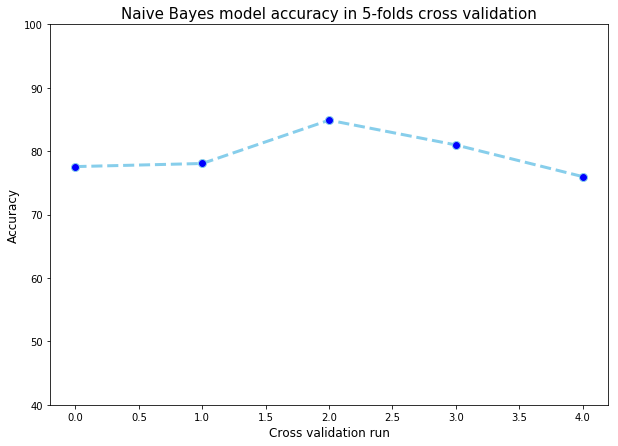

In [76]:
#Plotting the accuracy of cross validation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(accuracy_NB, marker='o',\
         markerfacecolor='blue', markersize=8, color='skyblue',\
         linewidth=3, linestyle='dashed')
plt.ylim([40,100])
plt.title("Naive Bayes model accuracy in 5-folds cross validation", fontsize = 15)
plt.xlabel("Cross validation run", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.show()

In [77]:
print("The average accuracy on the Naive Bayes model in 5 folds cross validation is {a}%".format(a=round(sum(accuracy_NB)/5,4)))

The average accuracy on the Naive Bayes model in 5 folds cross validation is 79.4888%


In [81]:
# Defining an empty class list
Disengagement_class_rand = list()

# Randomly assign class based on the calculated probability
for i in range(0,n):
    Disengagement_class_rand.append(np.random.choice(['Controller', 'Perception System', 'Computer System'], p=[prob_controller, prob_perception_system, prob_computer_system]))

#Adding the Class random column to the data frame
df_dis['Classrand'] = Disengagement_class_rand

# Calculating the Accuracy:
correct_predictions_rand_count = list(df_dis['Classrand'] == df_dis['Class']).count(True)

print("The accuracy of the random classifier is: {accr}%".format(accr=round((correct_predictions_count/n) * 100,4)))


The accuracy of the random classifier is: 15.1367%


NB model performs much better than chance based on our calculation.

The assumptions in NB in the context of this problem includes the NB common assumption that the probability of the features are independent. In this case, we assume that location, weather, and type of trigger are conditionally independent. However, this is not realistic because those factors might influence each other such as bad weather may cause an increase chance in manual type of trigger since humans will be more prone to pay more attention to the road.

1- Take into consideration that in reality, features are conditionally dependent (in this particular dataset). In that case, Naive Bayes is not applicable as it violates the original assumption that the features are conditionally independent.

Using domain knowledge we know that weather or location may have a significant effect on the type of trigger. So, we calculate the probability of class given its features using the Bayes theorem without assuming the feature independence. Therefore, it will also inlcude terms such as $\bf{P(Trigger|Weather)}$ and $\bf{P(Trigger|Location)}$.

2- Improvements can be gained in classification accuracy by changing the current method from Naive Bayes to a more sophisticated classification algorithm such as Logistic Regression, Random Forest etc.

3- Having more data and features can train the Naive Bayes model better, which may lead to higher accuracy.